In [1]:
# importing libraries
# 5th command helps to print the graphs in this same sheet

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
companies = pd.read_csv(r'C:\Users\n838134\Desktop\Machine Learning\SimpliLearn\1000_companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# create a subset of the independent/dependent variables with all observations

X = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values

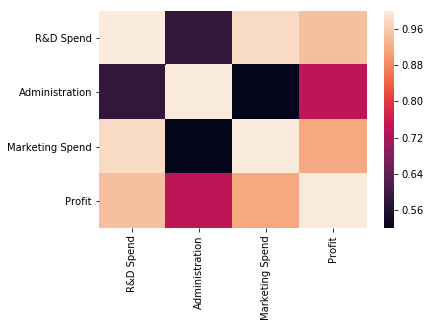

In [4]:
# graph colors can be changes using cmap, ex: cmap="YlGnBu" 

sns.heatmap(companies.corr())

In [5]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 ...
 [100275.47 241926.31 227142.82 'California']
 [128456.23 321652.14 281692.32 'California']
 [161181.72 270939.86 295442.17 'New York']]


In [6]:
# following code helps to create a bins for categorical variables
# labelencoder creates the numerical values of the categorical field values
# onehotencoder helps to create bins, an equivalent code pd.get_dummies(companies) can be used
# get_dummies creates the dummy variables for all the object fields in the data
# get_dummies returns a dataframe  with encodings based on the values in the dataframe we pass to it & be good for a quick analysis

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [7]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0027547e+05,
        2.4192631e+05, 2.2714282e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2845623e+05,
        3.2165214e+05, 2.8169232e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6118172e+05,
        2.7093986e+05, 2.9544217e+05]])

In [8]:
# to solve the problem of using categorical variables, but got trapped by the problem of Multicollinearity
# onehotencoder directly induces perfect multicollinearity, we drop one of the columns from the encoded features

X = X[:,1:]

In [9]:
X

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0027547e+05, 2.4192631e+05,
        2.2714282e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2845623e+05, 3.2165214e+05,
        2.8169232e+05],
       [0.0000000e+00, 1.0000000e+00, 1.6118172e+05, 2.7093986e+05,
        2.9544217e+05]])

In [10]:
from sklearn.linear_model import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

ImportError: cannot import name 'train_test_split'

In [11]:
# split the dataset to train, test versions, random_state=0 creates a different sample every time

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [12]:
X_train

array([[0.00000000e+00, 0.00000000e+00, 3.83850000e+04, 1.16125967e+05,
        1.42843002e+05],
       [1.00000000e+00, 0.00000000e+00, 1.25610000e+05, 1.29007753e+05,
        3.11143877e+05],
       [0.00000000e+00, 0.00000000e+00, 1.01322000e+05, 1.25420790e+05,
        2.64280115e+05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.28760000e+04, 1.13835527e+05,
        1.12918344e+05],
       [0.00000000e+00, 0.00000000e+00, 6.67660000e+04, 1.20317403e+05,
        1.97604218e+05],
       [0.00000000e+00, 0.00000000e+00, 1.12108000e+05, 1.27013716e+05,
        2.85091731e+05]])

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(lin_reg.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [15]:
y_pred = lin_reg.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268863

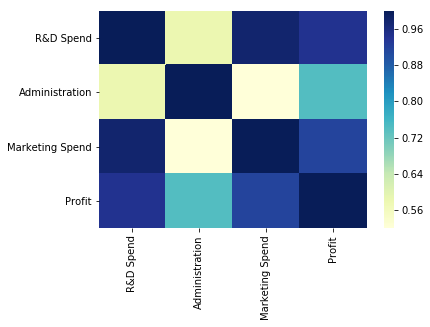

In [17]:
sns.heatmap(companies.corr(), cmap="YlGnBu")

In [18]:
pd.get_dummies()

TypeError: get_dummies() missing 1 required positional argument: 'data'

In [19]:
pd.get_dummies(companies)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.8000,471784.10000,192261.83000,0,0,1
1,162597.70,151377.5900,443898.53000,191792.06000,1,0,0
2,153441.51,101145.5500,407934.54000,191050.39000,0,1,0
3,144372.41,118671.8500,383199.62000,182901.99000,0,0,1
4,142107.34,91391.7700,366168.42000,166187.94000,0,1,0
5,131876.90,99814.7100,362861.36000,156991.12000,0,0,1
6,134615.46,147198.8700,127716.82000,156122.51000,1,0,0
7,130298.13,145530.0600,323876.68000,155752.60000,0,1,0
8,120542.52,148718.9500,311613.29000,152211.77000,0,0,1
9,123334.88,108679.1700,304981.62000,149759.96000,1,0,0
